# Quantum Mechanics
---
Problems in quantum mechanics have a very similar form indeed. One would start with the Schrödinger equation and then: 

    1. Define the Potential Energy, V. Defining the potential energy uniquely determines the problem. From toy models such as the Harmonic oscillator below to very complicated molecular problems. 
    
    2. Solve the Schrödinger Equation. This is indeed easier to say then do. The Schrödinger equation is exactly analytically solvable for toy models and the model of the hydrogen atom. Usually one would solve the Schrödinger equation numerically and aproximatelly. 
    
    3. Solving the Schrödinger equation (time independent) gives as one quantity the wavefunction - a central object in quantum mechanics whose module square can be interpreted as a probability density that is system is located somewhere. 
    
    4. Solving the Schrödinger equation (time independent) gives the allowed (quantized) energies of the system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

# Quantum harmonic oscillator

According to the classical harmonic oscillator, the potential energy will become $V(x) = \frac{1}{2}m\omega^2x^2$. The Schrodinger equation with this form of potential is $$-\frac{\hbar^2}{2m}\frac{\partial^2 \psi(x)}{\partial x^2}+\frac{1}{2}m\omega^2x^2\psi(x)=E\psi(x).$$
Following a similar procedure for 1D problems in quantum mechanics, one can derive the $\psi_n(x)$ and $E_n$.\
\
The general formula for the normalized wavefunctions is $$\psi_n(y)=(\frac{\alpha}{\pi})^{1/4}\frac{1}{\sqrt{2^n n!}}H_n(y)e^{-y^2/2}.$$
Here, $y=\sqrt{\alpha }x$ and $\alpha=\frac{m\omega}{\hbar}$. $H_n(y)$ are Hermite polynomials 
$$H_n(y)=(-1)^n e^{y^2}\frac{d^n}{dy^n}e^{-y^2}.$$
And the corresponding energy is $$E_n = (n+\frac{1}{2}\hbar \omega).$$, $n$ can take discrete values, n=0,1,2...
\
The quantum harmonic oscillator is one of the foundation problems of quantum mechanics. It can be applied rather directly to the explanation of the vibration spectra of diatomic molecules, but has implications far beyond such simple systems.

In [2]:
from sympy import *
from sympy.utilities.lambdify import lambdify
import math

In [3]:
def genHermite(n): #this is the function whic generates Hermite's polynomials
    x = symbols('x')
    init_printing(use_unicode=True)
    Hm = (-1)**n*exp(x**2)*diff(exp(-x**2),x,n)
    Hm_func = lambdify(x,Hm)

    return Hm_func

In [4]:
def psi_n(x,n,m=1,omega=1): #this generates the wavefunction out of Hermite polynomials for m=1 and omega=1
    alpha = m*omega
    y = np.sqrt(alpha)*x
    Hm_func = genHermite(n)
    return (alpha/np.pi)**(1/4)/(np.sqrt(2**n*math.factorial(n)))*Hm_func(y)*np.exp(-y**2/2)

In [5]:
def pot(x,m=1,omega=1): #this creates the potential (the potential is just quadratic in x)
    return 0.5*m*omega**2*x**2

In [6]:
def E_n(n,omega=1): #this creates the energy
    return (n+0.5)*omega

In [7]:
def prob_cl(n, m=1, omega=1):
    vmax  = np.sqrt((n+0.5)*omega*2/m)
    L = vmax/omega
    x = np.linspace(-L, L, 500)[4:496]
    v = vmax*np.cos(np.pi*x/L/2)
    return x, 1/v + (n+0.5)*omega
    

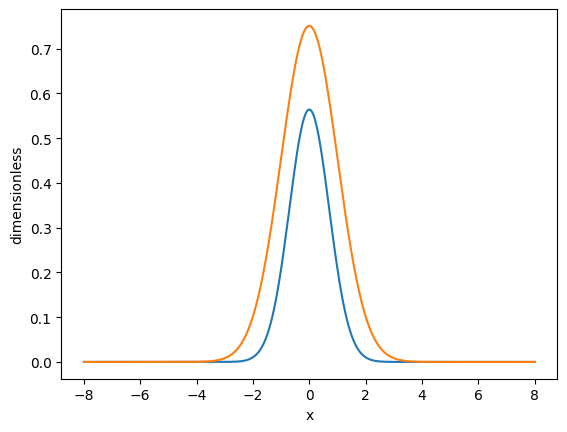

In [8]:
# show the wave function
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
L = 8
x = np.linspace(-L, L, 500)
V = pot(x)
n=0
mod_sq = psi_n(x,n)*psi_n(x,n)
plt.plot(x, mod_sq)

psi= psi_n(x,n)
plt.plot(x, psi)

plt.xlabel("x")
plt.ylabel("dimensionless")

plt.show()

# Probability

As n increases, we can observe the highest probability occurs at the boundary, which is back to classical mechanics. 

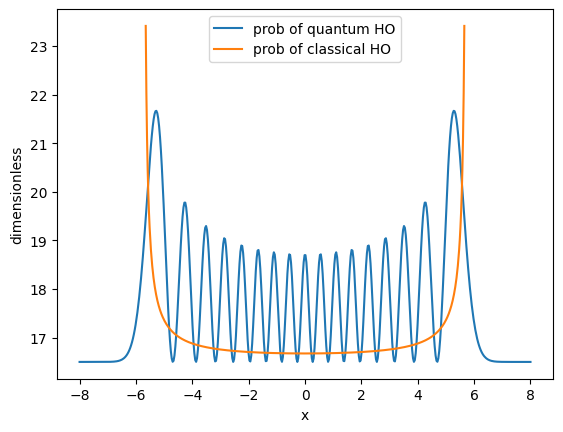

interactive(children=(IntSlider(value=16, description='n', max=16, min=4), Output()), _dom_classes=('widget-in…

In [9]:
# show the probability

#note that I re-scalled the figure

def update(n = 16):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    L = 8
    x = np.linspace(-L, L, 500)
    V = pot(x)
    psi_x = psi_n(x,n)
    prob_x = 20*psi_x*psi_x + E_n(n) # the factor 20 is to make probability be seen in the plot
    x_cl, prob_x_cl = prob_cl(n)
    plt.plot(x, prob_x, label='prob of quantum HO') # prob of quantum HO
    plt.plot(x_cl, prob_x_cl, label='prob of classical HO') # prob of classical HO

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("dimensionless")
    plt.show()
    

interact(update, n = widgets.IntSlider(value = 20, min=4, max=16));